# Visualising Sales Data in Python

## Contents

This study creates plots to understand the historical trends in automobile sales during recession periods for a hypothetical company 'XYZAutomotives'. The dataset is synthetic and the Plots are created using Matplotib, Seaborn, Folium, Plotly, and Dash. 

*The data set contains the following variables*: 



| Variable               | Description                                                      |
|-------------------------|------------------------------------------------------------------|
| Date                    | The date of the observation.                                    |
| Recession               | A binary variable indicating recession period; 1 means it was a recession, 0 means it was normal. |
| Automobile_Sales        | The number of vehicles sold during the period.                  |
| GDP                     | The per capita GDP value in USD.                                |
| Unemployment_Rate       | The monthly unemployment rate.                                 |
| Consumer_Confidence     | A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases. |
| Seasonality_Weight      | The weight representing the seasonality effect on automobile sales during the period. |
| Price                   | The average vehicle price during the period.                    |
| Advertising_Expenditure | The advertising expenditure of the company.                     |
| Vehicle_Type            | The type of vehicles sold; Supperminicar, Smallfamilycar, Mediumfamilycar, Executivecar, Sports. |
| Competition             | The measure of competition in the market, such as the number of competitors or market share of major manufacturers. |
| Month                   | Month of the observation extracted from Date.                   |
| Year                    | Year of the observation extracted from Date.                    |observation extracted from Date.                     |




*Recession periods*:<br>
* recession period 1 - year 1980 <br>
* recession period 2 - year 1981 to 1982<br>
* recession period 3 - year 1991<br>
* recession period 4 - year 2000 to 2001<br>
* recession period 5 - year end 2007 to mid 2009<br>
* recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Part 1: Visualising Data with Matplotib, Seaborn, and Folium

### Importing the data

In [6]:
!pip install requests

import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)
data = response.content.decode('utf-8')
df = pd.read_csv(StringIO(data))

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Installing and importing required libraries

In [9]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### 1.1 Developing a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year (annotating at least two recession periods)

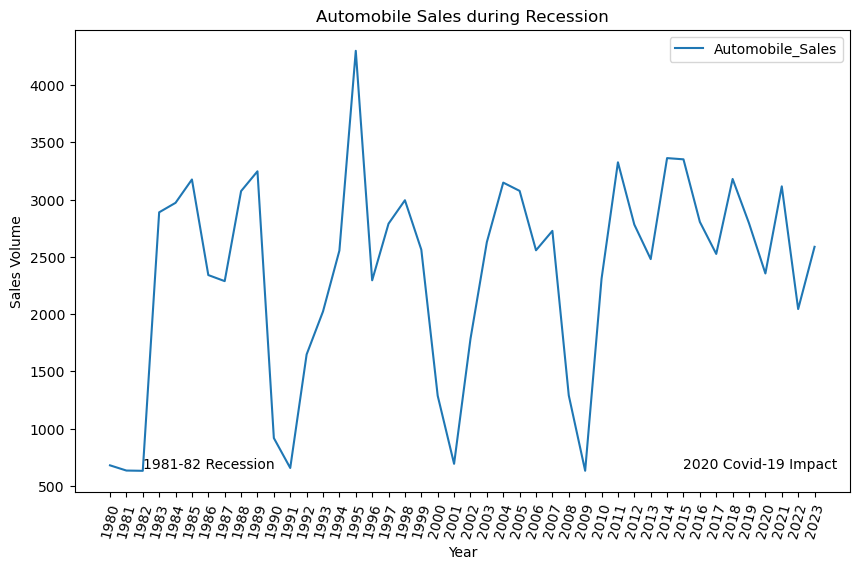

In [11]:
#creating data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
#creating figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2015, 650, '2020 Covid-19 Impact')
plt.legend()
plt.show()

### 1.2 Ploting different lines for categories of vehicle type 

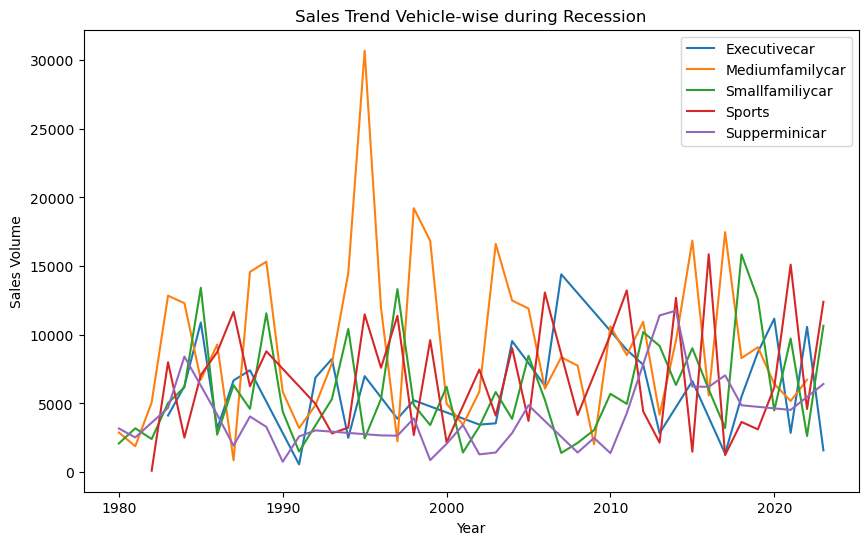

In [12]:
plt.figure(figsize=(10, 6))
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

### 1.3 Using the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period


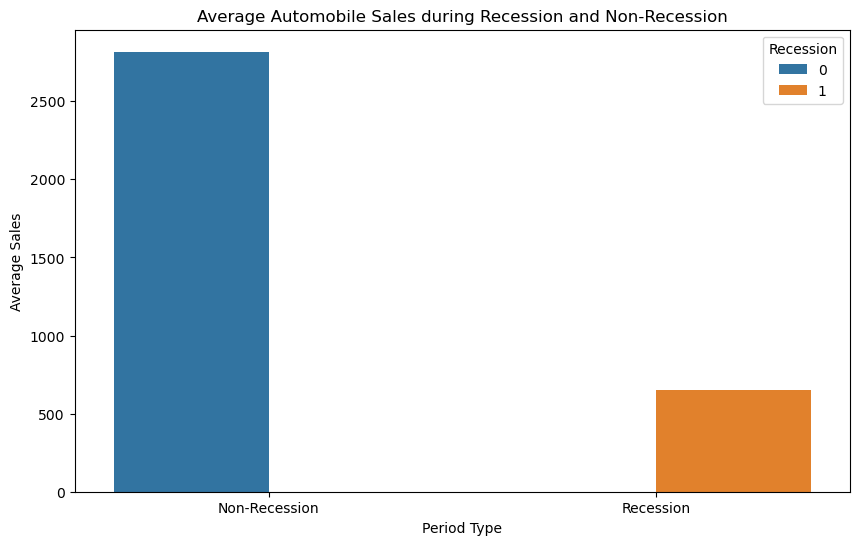

In [13]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.ylabel('Average Sales')
plt.xlabel('Period Type')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Compare the sales of different vehicle types during a recession and a non-recession period

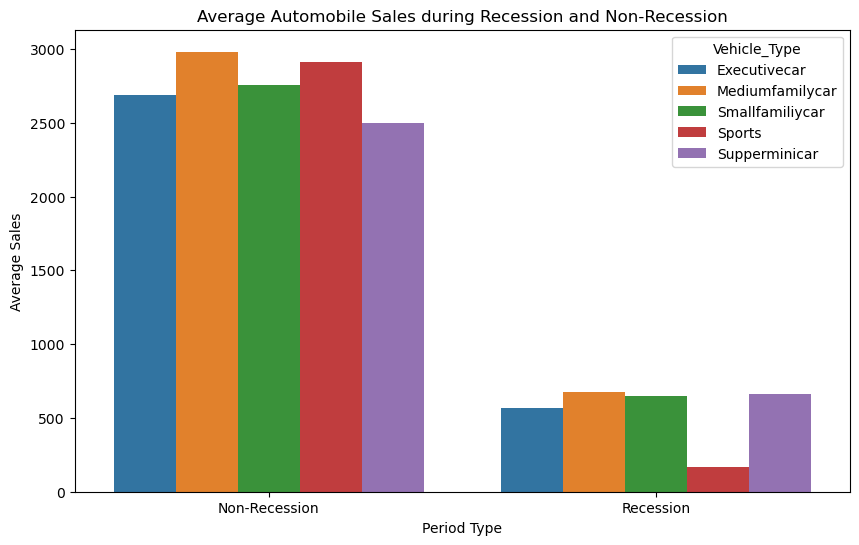

In [18]:
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Creating the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type',  data=dd)
plt.ylabel('Average Sales')
plt.xlabel('Period Type')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### 1.4 Using sub plotting to compare the variations in GDP during recession and non-recession periods by developing line plots for each period

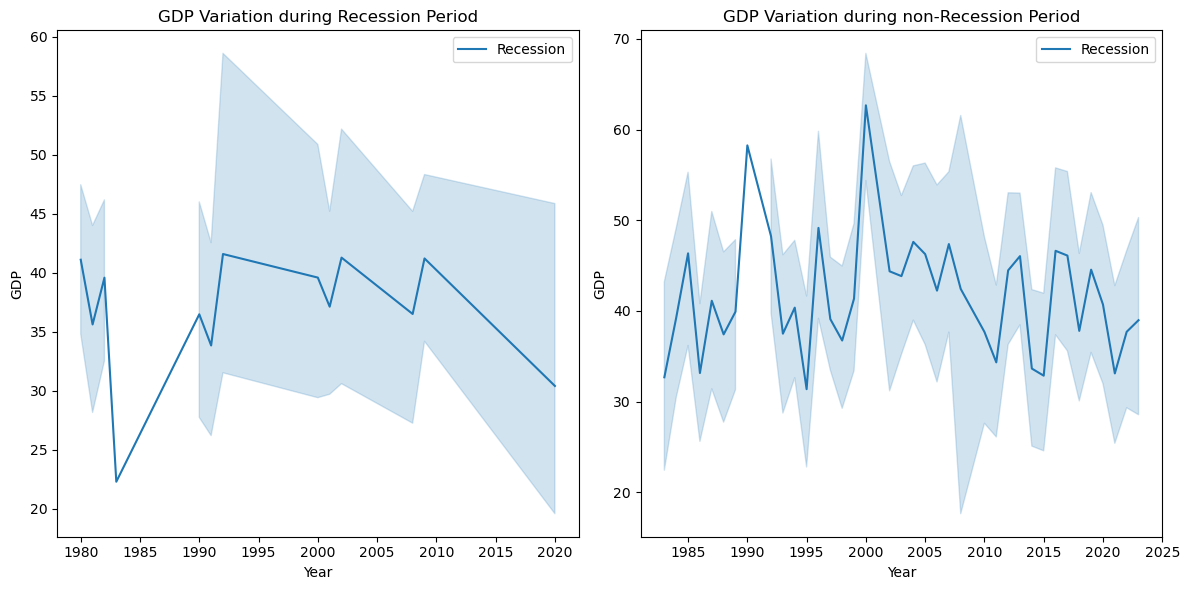

In [19]:
#Creating dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # adding subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot( 1, 2, 2) # adding subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during non-Recession Period')
    
plt.tight_layout()
plt.show()

Using sub plotting method to create the same graph

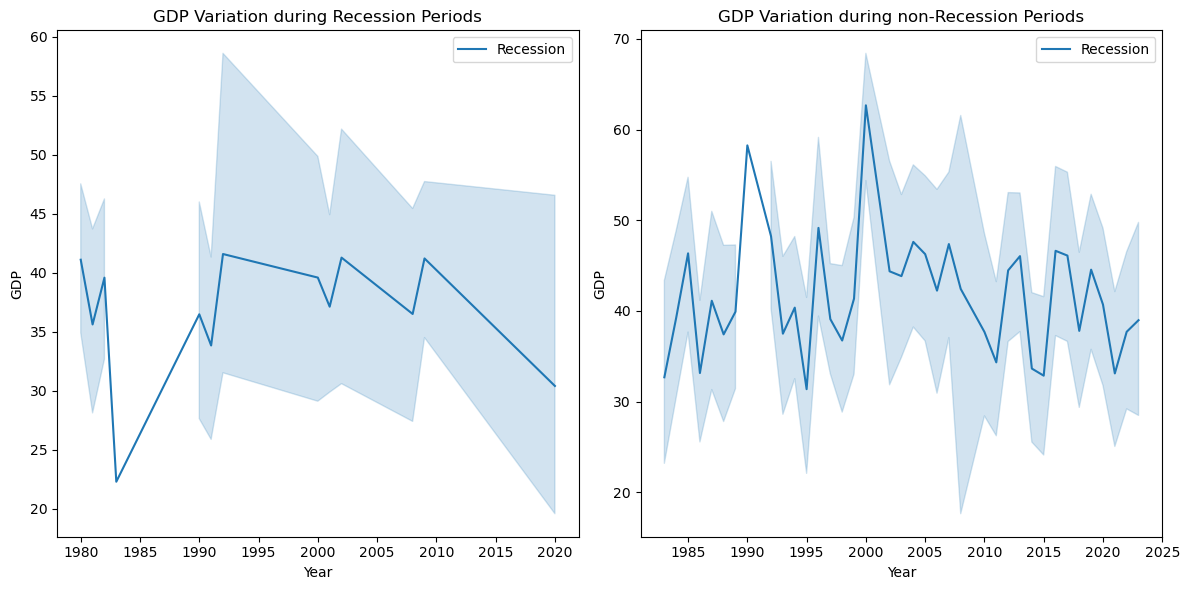

In [22]:
#Using subplot()
plt.figure(figsize=(12, 6))
    
#subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title("GDP Variation during Recession Periods")
plt.legend()
#subplot 2
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title("GDP Variation during non-Recession Periods")
plt.legend()
    
plt.tight_layout()
plt.show()

### 1.5 Developing a Bubble plot for displaying the impact of seasonality on Automobile Sales

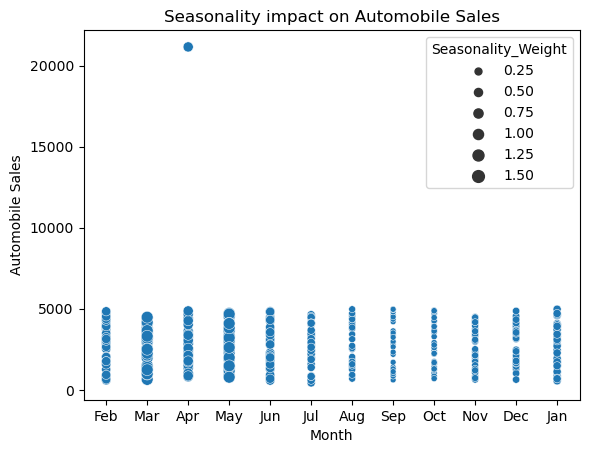

In [24]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

Adding hue

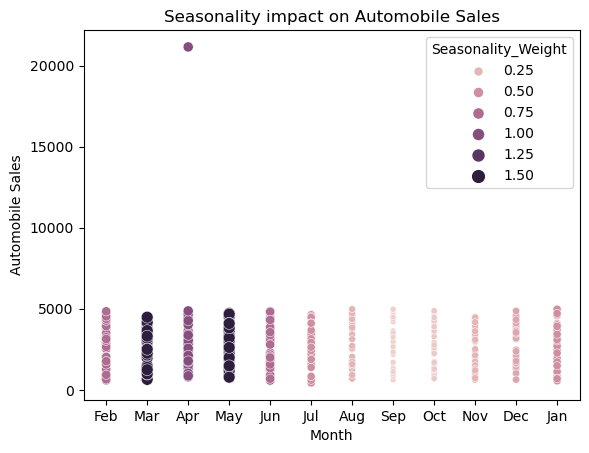

In [30]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', size=size)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### 1.6 Using the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relative to the sales volume during recessions

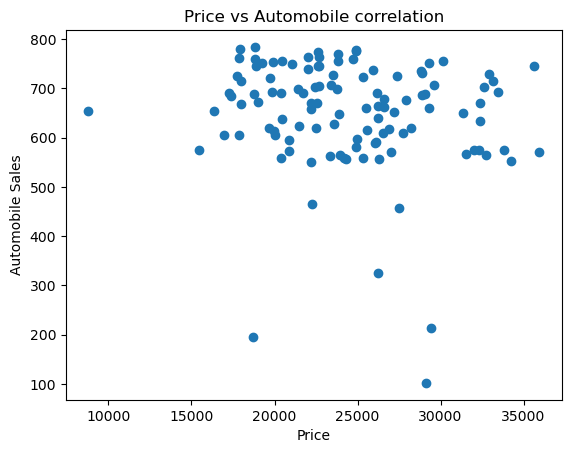

In [36]:
 #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Price vs Automobile correlation')
plt.show()

 ### 1.7 Creating a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods

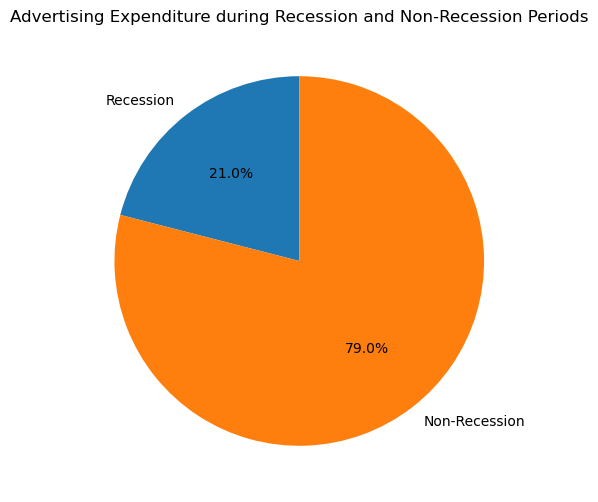

In [38]:
# Filtering the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculating the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Creating a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

### 1.8 Developing a pie chart to display the total advertisement expenditure for each vehicle type during recession period

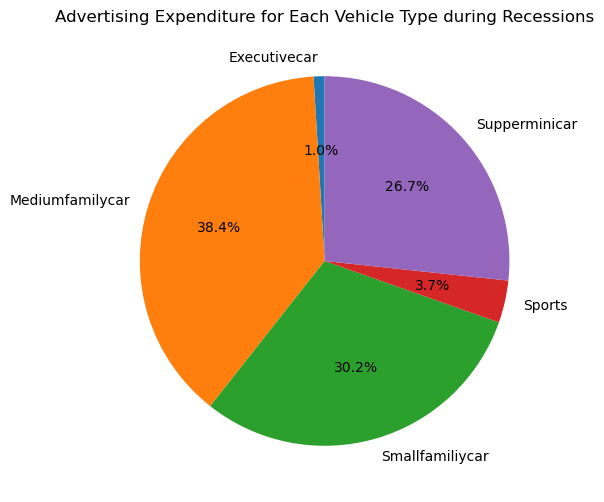

In [43]:
# Filtering the data 
Rdata = df[df['Recession'] == 1]

# Calculating the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Creating a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(8, 6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure for Each Vehicle Type during Recessions')

plt.show()

### 1.9 Developing a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

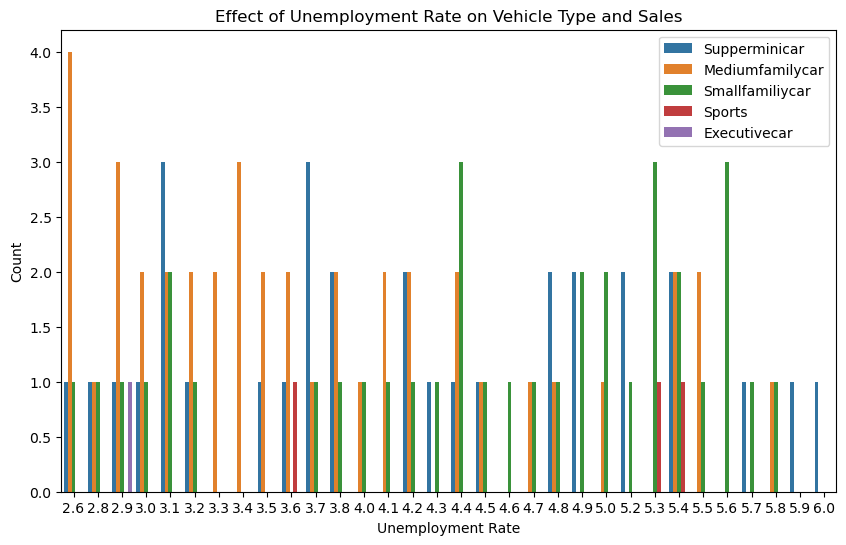

In [44]:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(10, 6))
    
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

### 1.10 Creating a map on the hightest sales region/offices of the company during recession period

In [47]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, "us-states.json")

In [78]:
# Filtering the data for the recession period and specific cities
recession_data = data[data['Recession'] == 1]

# Calculating the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()


# Creating a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Creating a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Adding tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Displaying the map
map1

# Part 2: Visualising Data With Plotly and Dash

### 2.1 Creating a dash application and giving it a title

In [97]:
# importing dash after installing dash using the system terminal (pip install dash)
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initializing the Dash app
app = dash.Dash(__name__)

# Setting the title of the dashboard
app.title = "Automobile Statistics Dashboard"

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Statistics Dashboard", style={'textAlign': 'center', 'color': '503D36', 'font-size': 24}),
])



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/anaconda3/lib/python3.11/site-packages/pandas/core/groupby/generic.py:1610, in DataFrameGroupBy.__getitem__(
    self=<pandas.core.groupby.generic.DataFrameGroupBy object>,
    key='Unemployment_Rate'
)
   1601 if isinstance(key, tuple) and len(key) > 1:
   1602     # if len == 1, then it becomes a SeriesGroupBy and this is actually
   1603     # valid syntax, so don't raise warning
   1604     warnings.warn(
   1605         "Indexing with multiple keys (implicitly converted to a tuple "
   1606         "of keys) will be deprecated, use a list instead.",
   1607         FutureWarning,
   1608         stacklevel=2,
   1609     )
-> 1610 return super().__getitem__(key)
        key = 'Unemployment_Rate'

File ~/anaconda3/lib/python3.11/site-packages/pandas/core/base.py:228, in SelectionMixin.__getitem__(
    self=<pandas.core.groupb

### 2.2 Adding drop down menus for report type and year with apporiate titles and options

In [96]:
# Loading the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initializing the Dash app
app = dash.Dash(__name__)

# Setting the title of the dashboard
app.title = "Automobile Statistics Dashboard"

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Statistics Dashboard", style=style),
    
    # Adding first drop-down menu for report type
    dcc.Dropdown(
        id='dropdown-statistics', 
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        placeholder='Select a report type',
        style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
    ),
    
    # Adding second drop-down menu for selecting year
    dcc.Dropdown(
        id='select-year', 
        options=[{'label': i, 'value': i} for i in range(1980, 2024, 1)],
        placeholder='Select Year',
        style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
    ),
    
    
])



### 2.3 Adding the output division for display with appropriate id and classname property

In [95]:
# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initializing the Dash app
app = dash.Dash(__name__)

# Setting the title of the dashboard
app.title = "Automobile Statistics Dashboard"
style = {'textAlign': 'center', 'color': '503D36', 'font-size': 24}

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Statistics Dashboard", style=style),
    
    # Adding first drop-down menu for report type
    dcc.Dropdown(
        id='dropdown-statistics', 
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        placeholder='Select a report type',
        style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
    ),
    
    # Adding second drop-down menu for selecting year
    dcc.Dropdown(
        id='select-year', 
        options=[{'label': i, 'value': i} for i in range(1980, 2024, 1)],
        placeholder='Select Year',
        style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
    ),
    
    # Adding the output division for display
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
    
    # Add other components here
])



### 2.4 Creating Callbacks; Defining the callback function to update the input container based on the selected statistics and the output container

In [80]:
# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initializing the Dash app
app = dash.Dash(__name__)

# Setting the title of the dashboard
app.title = "Automobile Statistics Dashboard"
style = {'textAlign': 'center', 'color': '503D36', 'font-size': 24}

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Statistics Dashboard", style=style),
    
    # Adding first drop-down menu for report type
    dcc.Dropdown(
        id='dropdown-statistics', 
        options=[
            {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
            {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
        ],
        placeholder='Select a report type',
        style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
    ),
    
    # Adding second drop-down menu for selecting year
    dcc.Dropdown(
        id='select-year', 
        options=[{'label': i, 'value': i} for i in range(1980, 2024, 1)],
        placeholder='Select Year',
        style={'width': '80%', 'padding': '3px', 'fontSize': '20px', 'textAlignLast': 'center'}
    ),
    
    # Adding the output division for display
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
])

# Callback for enabling/disabling the input container
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return False
    else:
        return True

# Callback for plotting
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, selected_year):
    if selected_statistics == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]
    else:
        non_rec_data = data[data['Recession'] == 0]


### 2.5/2.6 Creating graphs for Recession Report Statistics and Yearly Statistics

In [100]:
# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initializing the Dash app
app = dash.Dash(__name__)

# Create dropdown options and year list
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
year_list = [i for i in range(1980, 2024, 1)]

# Defining the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Statistics Dashboard", style={'textAlign': 'center'}),
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options,
            value='Yearly Statistics',
            placeholder='Select a report type'
        )
    ]),
    html.Div(dcc.Dropdown(
        id='select-year',
        options=[{'label': i, 'value': i} for i in year_list],
        value='1980'
    )),
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
])

# Callback for enabling/disabling the input container
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return False
    else:
        return True

# Callback for plotting
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)

# Creating and displaying graphs for Recession Report Statistics and Yearly Statistics
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec, x='Year', y='Automobile_Sales', title="Average Automobile Sales fluctuation over Recession Period")
        )
        
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()                           
        R_chart2 = dcc.Graph(
            figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales', title="Average Sales by Vehicle Type")
        )
        
        exp_rec = recession_data.groupby('Vehicle_Type')['Price'].sum().reset_index()
        R_chart3 = dcc.Graph(
            figure=px.pie(exp_rec, values='Price', names='Vehicle_Type', title="Expenditure Share by Vehicle Type")
        )
        
        unemployment_effect = recession_data.groupby('Vehicle_Type')['Unemployment_Rate'].mean().reset_index()
        R_chart4 = dcc.Graph(
            figure=px.bar(unemployment_effect, x='Vehicle_Type', y='Unemployment_Rate', title="Unemployment Effect on Vehicle Sales")
        )
        
        return [
            html.Div(className='chart-item', children=[R_chart1, R_chart2]),
            html.Div(className='chart-item', children=[R_chart3, R_chart4])
        ]
    elif selected_statistics == 'Yearly Statistics' and input_year:
        yearly_data = data[data['Year'] == int(input_year)]
        
        yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales', title="Yearly Automobile Sales"))
        
        yms = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(yms, x='Month', y='Automobile_Sales', title="Total Monthly Automobile Sales"))
        
        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales', title='Average Vehicles Sold by Vehicle Type'))
        
        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type', title='Advertisement Expenditure'))
                                           
        return [
            html.Div(className='chart-item', children=[Y_chart1, Y_chart2]),
            html.Div(className='chart-item', children=[Y_chart3, Y_chart4])
        ]
    else:
        return None                
                                        
# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
